# Расчёт погрешностей измерений и правила их построения

## Вычисление погрешностей данных
В ходе любого измерения возникают ошибки, которые необходимо учитывать при использовании полученных значений. Сегодня обсудим какие ошибки бывают в принципе, как они считаются и какие методы языка можно применить для оптимизации 

Представление погрешностей можно разделить на _2_ вида:
1) _Абсолютная_ - отличие значения от эталонного или наиболее вероятного в тех же единицах измерения<br> 
$$\Delta x_i = |x_i-x_{вр}|$$
2) _Относительная_ - отличие значения от эталонного или наиболее вероятного выраженное в процентах<br>
$$\varepsilon = \frac{\Delta x}{x_{вр}}$$

Виды ошибок:
1) _Грубый_ - в результате неточностей в проведении эксперимента. При наличие такого вида результаты можно считать **ложными** и не учитывать
2) _Систематический_ - вызван самим прибором или методом измерений. Она известна заранее, исходя из используемого оборудования
3) _Случайная_ - появляется из-за множества внешних факторов

Виды физических измерений:
1) _Прямые физические измерения_ - считывание значения со шкалы, индикатора прибора или сравнением с эталоном
2) _Косвенные физические измерения_ - получаются расчётом из результатов других измерений

Последние две классификации будут определять метод вычисления погрешностей.

### Наиболее вероятное значение
Может быть известно (например при калибровке оборудования) или расчитанно при наличии статистики. Как правило, за него принимается среднее арифметическое результатов серии прямых измерений 
$$X_{вр}=\frac{\sum_{i=1}^NX_i}{N}$$
Относительно него будем считать погрешности

### Абсолютная погрешность прямых физических измерений
Для однократных измерений абсолютной погрешностью является половина цена наименьшего деления шкалы или значение, пересчитанное из относительной погрешности прибора<br>

В случаи серии получаем погрешность каждого измерения относительно наиболее вероятного значения и считаем стандартную ошибку среднего(средней квадратичной погрешности)
$$s=\sqrt{\frac{1}{N(N-1)}\sum_{k=1}^N(X_k-X_{вр})^2}$$

### Абсолютная погрешность косвенных измерений
Будем искать погрешность $y$, которую вычисляем как функцию от $x$: $y=f(x)$<br>

Проведя касательную к $f(x)$ в некоторой точке и приняв значения $\Delta x$ и $\Delta y$ малыми, то получим, что:
$$\Delta y = f'(x)\cdot\Delta x$$

В общем случаи:
$$\Delta y = \frac{\partial y}{\partial x_1}\cdot\Delta x_1+\frac{\partial y}{\partial x_2}\cdot\Delta x_2...$$
то есть, для функции многих переменных погрешность определяется суммой вклада каждой из них, умноженной на частную производную по этой переменной

Для подобных расчётов можно применить `sympy`

In [98]:
import sympy as sp
import numpy as np
import math

# Объявляем переменные
x, y = sp.symbols('x y')

# Определяем функцию от двух переменных
f = x**2 + y**2 + x*y + sp.exp(x)

# Вычисляем первую производную по x
df_dx = sp.diff(f, x)
print(f'Первая производная по x: {df_dx}')

# Вычисляем первую производную по y
df_dy = sp.diff(f, y)
print(f'Первая производная по y: {df_dy}')

x_val = 1
y_val = 2

# Подставляем значения в первую производную
df_dx_val = float(df_dx.subs({x: x_val, y: y_val}))
df_dy_val = float(df_dy.subs({x: x_val, y: y_val}))

df_dx_val, df_dy_val


Первая производная по x: 2*x + y + exp(x)
Первая производная по y: x + 2*y


(6.7182818284590455, 5.0)

При этом можно легко комбинировать получившиеся выражения:

In [103]:
# Погрешность первой величины
dx = 0.1

# Погрешность второй величины
dy = 0.005

dF = df_dx*dx+df_dy*dy
print(dF)

float(dF.subs({x: 0, y: 3}))

0.205*x + 0.11*y + 0.1*exp(x)


0.43000000000000005

Мы не будем углубляться в данную библиотеку, подробнее можно почитать [здесь](https://pythonru.com/biblioteki/sympy-v-python)

###  Относительная погрешность косвенных измерений

Проделаем некоторые преобразования с начальным выражением
$$\varepsilon=\frac{\Delta y}{y}=\frac{f'(x)}{f(x)}\cdot\Delta x=(ln(f(x)))'\cdot\Delta x$$

То есть, можно применять тот же подход, что и к абсолютной погрешности

## Округление результатов

Из-за отклонений от идеального значения, пропадает смысл указывать большое количество цифр в ответе, если они меньше погрешности. Принято оставлять 1 или 2 значащие цифры в погрешности, причём, 1 цифра будет только если она от 2 и более с округлением к ближаёшему значению:<br>

$1.245 \simeq 1.2$<br>
$3.1 \simeq 3$<br>
$4.526 \simeq 5$<br>

Результат сохраняет разряды, которые *не меньше* значащего в погрешности:<br>

$122.21$ с погрешностью $1.53$ -> $122 \pm 2$<br>
$29362.46$ с погрешностью $53$ -> $29360 \pm 50$<br>

Более того, принято представлять значения в нормализованном виде, т.е. в целой части оставлять одну цифру, умноженную на 10 в некоторой степени с общей размерностью:<br>

$29362.46$ м с погрешностью $53$ м -> $29360$ м $ \pm 50$ м -> $(2936 \pm 5)\cdot 10^1$ м<br>

Относительная погрешность всегда округляется до двух значащих
цифр

# Правила графического представления данных

### Оси

Выбирая отображаемые числовые значения подписей на осях, должны придерживаться одинакового значащего разряда с равными отличиями, т.е. пусть единичный отрезок выбран в размере $0.1 ~mm$ (рекомендуем выбирать равным $1, 2, 5~(\cdot 10^n)$), тогда все подписи должны отличаться на него, например:

([<matplotlib.axis.YTick at 0x13c2e0aff80>,
 [Text(0, 0.0, '$\\mathdefault{0.0}$'),
  Text(0, 0.2, '$\\mathdefault{0.2}$'),
  Text(0, 0.4, '$\\mathdefault{0.4}$'),
  Text(0, 0.6000000000000001, '$\\mathdefault{0.6}$'),
  Text(0, 0.8, '$\\mathdefault{0.8}$')])

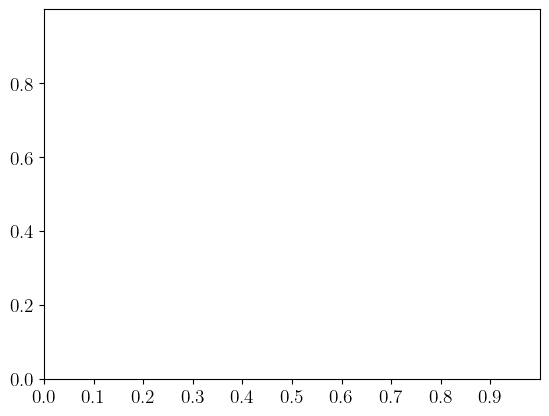

In [73]:
import matplotlib.pyplot as plt
import numpy as np

ones_x = 0.1
ticks_x = np.arange(0, 1, 0.1)
ones_y = 0.2
ticks_y = np.arange(0, 1, 0.2)


plt.xticks(fontsize=14, ticks=ticks_x)
plt.yticks(fontsize=14, ticks=ticks_y)

При этом, общий множитель лучше выносить к размерности в правый нижний и верхний левый угол в соответствии с осями

([<matplotlib.axis.YTick at 0x13c305e7ec0>,
 [Text(0, 0.0, '$\\mathdefault{0}$'),
  Text(0, 2.0, '$\\mathdefault{2}$'),
  Text(0, 4.0, '$\\mathdefault{4}$'),
  Text(0, 6.000000000000001, '$\\mathdefault{6}$'),
  Text(0, 8.0, '$\\mathdefault{8}$')])

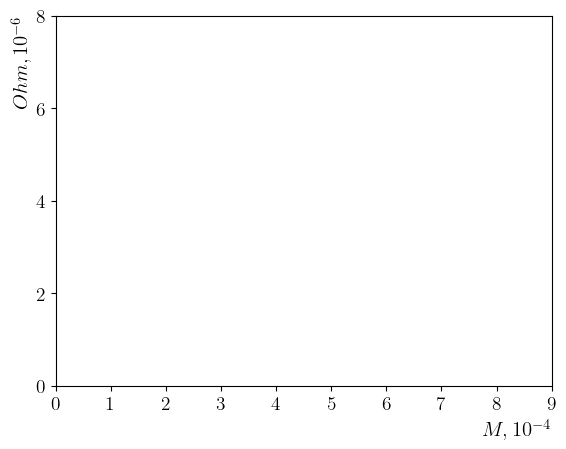

In [71]:
plt.rc('text', usetex=True)

plt.xlabel(r'$M, 10^{-4}$', loc='right', fontsize=15)
plt.ylabel(r'$Ohm, 10^{-6}$', loc='top', fontsize=15)

plt.xticks(fontsize=14, ticks=ticks_x*10)
plt.yticks(fontsize=14, ticks=ticks_y*10)

Необязательно начинать отчёт с точки _(0,0)_ - тогда указываются координаты новой точки

(-8.0, 1.0)

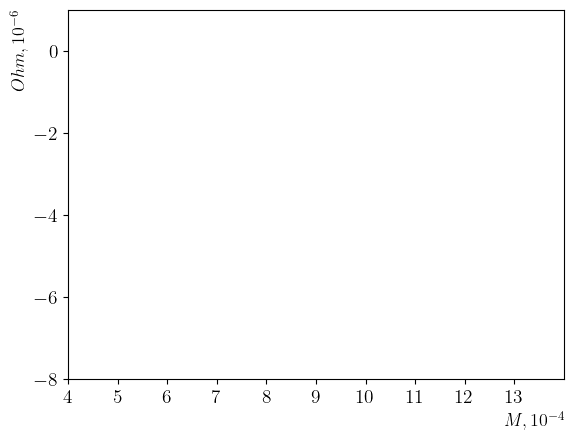

In [70]:
plt.xlabel(r'$M, 10^{-4}$', loc='right', fontsize=13)
plt.ylabel(r'$Ohm, 10^{-6}$', loc='top', fontsize=13)

plt.xticks(fontsize=14, ticks=ticks_x*10+4)
plt.yticks(fontsize=14, ticks=ticks_y*10-8)

plt.xlim(4, 14)
plt.ylim(-8, 1)

Нужно помнить, что значения на оси не всегда соответствуют кооржинатам точек на графиках. При необходимости выдельть какое-то значение, требуется добавить новую метку. Как вариант, использовать `plt.annotate`, добавляющая подпись со стрелкой

Text(6.1, -1.2000000000000002, '(5.6, -2.2)')

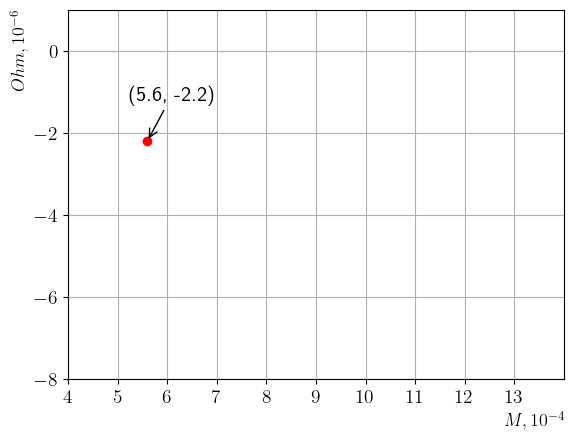

In [69]:
x = 5.6
y = -2.2

# Добавляем точку на график
plt.plot(x, y, 'ro')


plt.xlabel(r'$M, 10^{-4}$', loc='right', fontsize=13)
plt.ylabel(r'$Ohm, 10^{-6}$', loc='top', fontsize=13)

plt.xticks(fontsize=14, ticks=ticks_x*10+4)
plt.yticks(fontsize=14, ticks=ticks_y*10-8)

plt.xlim(4, 14)
plt.ylim(-8, 1)

plt.grid(True)

plt.annotate(text=f'({x}, {y})',
             xy=(x, y), 
             xytext=(x+0.5, y+1),  # Положение текста
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=15,
             ha='center')



### Линии и маркеры

Размер и цвета подбираются так, чтобы было удобно различать отдельные кривые. Цаета или тип соседних линий выбираются контрастными, а размер маркеров как минимум вдвое толще самой линии. Желательно сохранять размеры всех линий одинаковыми

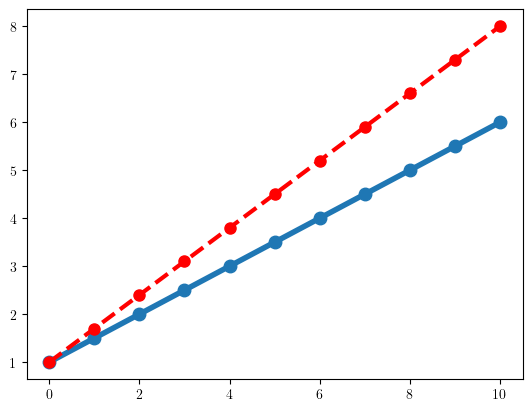

In [67]:
x = np.linspace(0, 10, 11)
plt.plot(x, np.linspace(1, 6, 11), 'o-', markersize=9, linewidth=4)
plt.plot(x, np.linspace(1, 8, 11), 'o--', markersize=8, linewidth=3, color='r')

При отображении погрешностей маркеры и ошибки для одной линии должны быть одного цвета - так вы уменьшите количество отдельно воспринимаемых элементов и упростите восприятие ваших данных. В этом же может помочь уменьшение количества отображаемых числовых значений.

### Текст

Как на подписях, так и в легенде размер букв должен обеспечивать хорошую читаемость всего изображённого текста. регулируйте это аргументами **fontsize** и **labelsize**, при этом не забывайте увеличивать тики на осях одновременно с изменением размеров чисел

http://py.scilink.ru/1_6_matplotlib_example/
http://ostashevvb.spb.ru/Download/Errors.pdf